# AdaBoost Algorithm
AdaBoost Algorithm is a boosting Technique which works by combining weak learning point into strong learning points. A good way for a prediction model to correct its predecessor is to give more attention to the training samples where the predecessor did not fit well.
This can result in a new prediction model which will focus much on the hard instances. This technique is used by an AdaBoost Algorithm.

#### Training a Base Classifier
To implement AdaBoost Classifier algorithm, We first need to train Base Classification Model for this we are going to train Decision Tree Algorithm as a base Classification model. To start with importing necessary libraries:

In [1]:
# Import common Libraries
import sys
import os
import numpy as np
import pandas as pd
import sklearn

# Make notebook's output stable across run

# Visualization libraries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [2]:
# Training Base classification of Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=700, noise=0.30, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

## AdaBoost Algorithm in Machine Learning
AdaBoost Algorithm increases the relative weight of less classified training samples. Then it trains another classification model by using the new updates weights of classified training samples and again predicts on the training set. 


In [3]:
ada_class = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm = "SAMME.R", learning_rate=0.5, random_state=44)
ada_class.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=44)

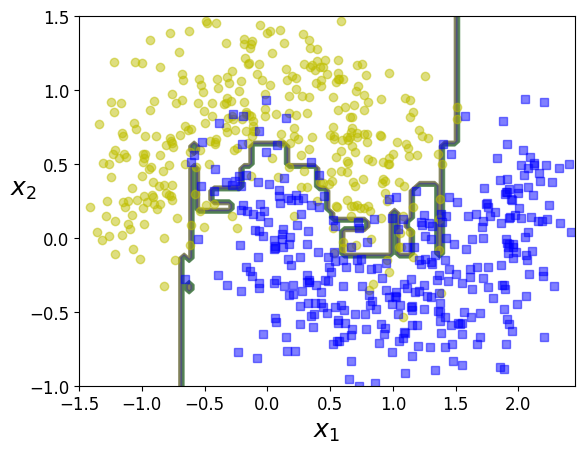

In [4]:
# Creating a helper function to plot a Decision Boundary.

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[0], axes[3], 100)

    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(ada_class, X, y)

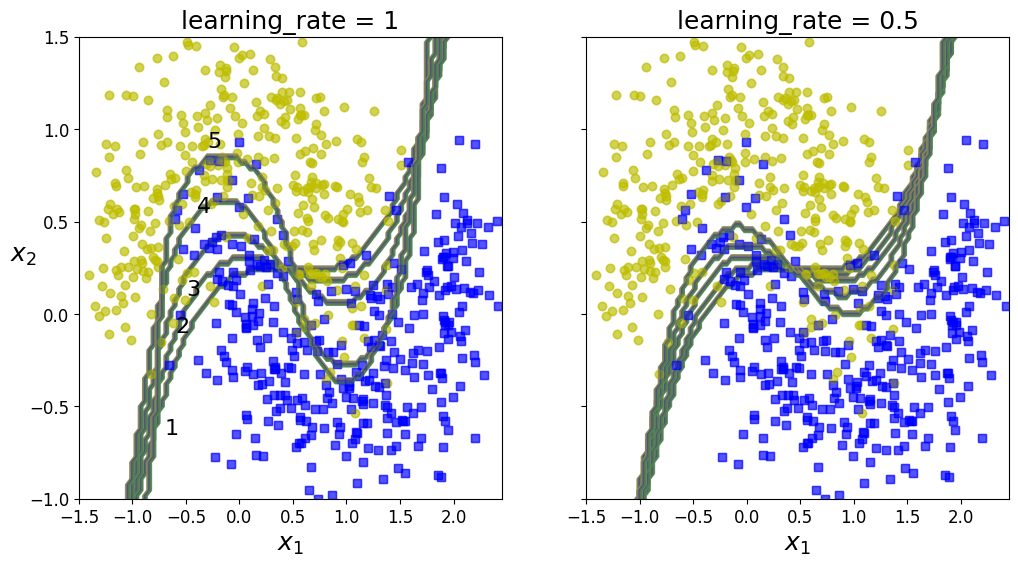

In [5]:
# plotting the results of our classification model using a decision boundary:

m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel='rbf', C=0.05, gamma='scale', random_state=44)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1+learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize = 18)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize = 16)
        plt.text(-0.6, -0.10, "2", fontsize = 16)
        plt.text(-0.5, 0.10, "3", fontsize = 16)
        plt.text(-0.4, 0.55, "4", fontsize = 16)
        plt.text(-0.3, 0.90, "5", fontsize = 16)
    else:
        plt.ylabel("")
plt.show()

The New classification algorithm does a better job in the same instance as used by the Decision Tree algorithm. The figure on the right represent the sequence of predictions used by the AdaBoost Algorithm. The learning rate is halved because the less classified weights are boosted half at every step of iterations. As we can see, The Algorithm added the predictions to the model and at the end made it performed better. if your model is overfitting on the training set, we can reduce the number of estimators.